# IMPORT PYTHON LIB & CONN DB

In [1]:
import pandas
import configparser
import psycopg2

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [2]:
config = configparser.ConfigParser()
config.read('config.ini')

host = config['myaws']['host']
db=config['myaws']['db']
user=config['myaws']['user']
pwd=config['myaws']['pwd']

In [3]:
conn = psycopg2.connect(
                        host = host,
                        user = user,
                        password = pwd,
                        dbname=db
                        )

In [4]:
cur=conn.cursor()

# Q1

In [5]:
sql_q1 = """
            select * from gp23.student
            """

In [6]:
df= pandas.read_sql_query(sql_q1,conn)
df[:]

,s_email,s_name,major
0,s1@jmu.edu,name1,IA
1,s2@jmu.edu,name2,IA
2,s3@jmu.edu,name3,IA
3,s4@jmu.edu,name4,GIS
4,s5@jmu.edu,name5,CIS
5,s6@jmu.edu,s6,GS


# Q2

In [7]:
sql_q2 = """
        select gp23.professor.p_name,
        gp23.course.c_name
        from gp23.professor
        inner join gp23.course
        on gp23.professor.p_email = gp23.course.p_email
        
        """

In [8]:
df= pandas.read_sql_query(sql_q2,conn)
df[:]

,p_name,c_name
0,Kathleen Moore,Technology Applications in a Networked World
1,Ron Raab,AWARENESS AND UNDERSTANDING C.B.R.WMD
2,Timothy Walton,Hypothesis Testing
3,new_p,new_c_name
4,new_p,"Data Mining, Modeling and Knowledge Discovery"


# Q3 

In [9]:
sql_q3 = """
        select c_number,
        count(c_number) as enrolled
        from gp23.enroll_list
        group by c_number
        order by enrolled desc
        """

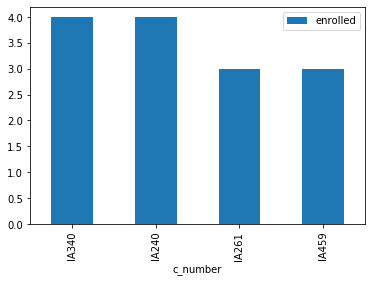

In [10]:
df= pandas.read_sql_query(sql_q3,conn)
df.plot.bar(y='enrolled',x='c_number')

# Q4

In [11]:
sql_q4 = """
        select gp23.professor.p_name,
        count(gp23.course.c_name) as teaching_number
        from gp23.professor
        inner join gp23.course
        on gp23.professor.p_email = gp23.course.p_email
        group by professor.p_name
        order by teaching_number desc
        """


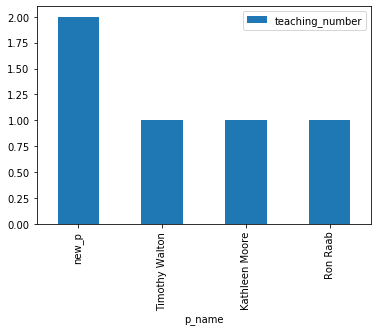

In [12]:
df= pandas.read_sql_query(sql_q4,conn)
df.plot.bar(y='teaching_number',x='p_name')

# Q5

In [22]:
sql_q5_professor = """
                    insert into gp23.professor(p_email,p_name,office)
                    values('{}','{}','{}')
                    """.format('new_p2@jmu.edu','new_p2','office_2')

In [23]:
cur.execute(sql_q5_professor)

In [21]:
cur.execute('ROLLBACK')

In [ ]:
conn.commit()

In [31]:
df=pandas.read_sql_query('select * from gp23.professor',conn)
df[:]

,p_email,p_name,office
0,moore8ka@jmu.edu,Kathleen Moore,ISAT/CS116
1,waltontr@jmu.edu,Timothy Walton,ISAT/CS326
2,raabrw@jmu.edu,Ron Raab,ISAT/CS156
3,new_p@jmu.edu,new_p,new_office
4,new_p2@jmu.edu,new_p2,office_2


In [27]:
sql_q5_course = """
                    insert into gp23.course(c_number,c_name,room,p_email)
                    values('{}','{}','{}','{}')
                    """.format('ia_new2','new_c_name2','online','new_p2@jmu.edu')

In [28]:
cur.execute(sql_q5_course)

In [26]:
cur.execute('ROLLBACK')

In [29]:
conn.commit()

In [30]:
df=pandas.read_sql_query('select * from gp23.course',conn)
df[:]

,c_number,c_name,room,p_email
0,IA240,Technology Applications in a Networked World,Online,moore8ka@jmu.edu
1,IA459,AWARENESS AND UNDERSTANDING C.B.R.WMD,ENGEO1301,raabrw@jmu.edu
2,IA261,Hypothesis Testing,ISAT/CS148,waltontr@jmu.edu
3,ia_new,new_c_name,online,new_p@jmu.edu
4,IA340,"Data Mining, Modeling and Knowledge Discovery",Online,new_p@jmu.edu
5,ia_new2,new_c_name2,online,new_p2@jmu.edu


# Q6

In [ ]:
sql_q6_course = """
                update gp23.course
                set p_email = '{}'
                where p_email = '{}'
                """.format('new_p@jmu.edu','weixx@jmu.edu')

In [ ]:
cur.execute(sql_q6_course)

In [ ]:
conn.commit()

In [33]:
df=pandas.read_sql_query('select * from gp23.course',conn)
df[:]

,c_number,c_name,room,p_email
0,IA240,Technology Applications in a Networked World,Online,moore8ka@jmu.edu
1,IA459,AWARENESS AND UNDERSTANDING C.B.R.WMD,ENGEO1301,raabrw@jmu.edu
2,IA261,Hypothesis Testing,ISAT/CS148,waltontr@jmu.edu
3,ia_new,new_c_name,online,new_p@jmu.edu
4,IA340,"Data Mining, Modeling and Knowledge Discovery",Online,new_p@jmu.edu
5,ia_new2,new_c_name2,online,new_p2@jmu.edu


In [34]:
sql_q6_professor = """
                delete from gp23.professor
                where p_email = '{}'
                """.format('weixx@jmu.edu')

In [35]:
cur.execute(sql_q6_professor)

In [36]:
conn.commit()

In [37]:
df=pandas.read_sql_query('select * from gp23.professor',conn)
df[:]

,p_email,p_name,office
0,moore8ka@jmu.edu,Kathleen Moore,ISAT/CS116
1,waltontr@jmu.edu,Timothy Walton,ISAT/CS326
2,raabrw@jmu.edu,Ron Raab,ISAT/CS156
3,new_p@jmu.edu,new_p,new_office
4,new_p2@jmu.edu,new_p2,office_2


# CLOSE CONNECTION

In [38]:
cur.close()
conn.close()

In [39]:
#SUMBIT